<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/Week_2_lab_linear_regression_with_polynomial_and_interaction_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importation and Configuration

In [1]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.5 MB/s eta 0:00:00


In [ ]:
import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge

##Data and Polynomial Feature Engineering

### The Dataset

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#  load and view the first 5 rows
df = pd.read_csv('/content/drive/MyDrive/poly-interact-synth-data.csv')


In [6]:
df.head()

,x1,x2,x3,y
0,1.764052,0.555963,-1.532921,32.453903
1,0.400157,0.892474,-1.711970,14.758467
2,0.978738,-0.422315,0.046135,5.225171
3,2.240893,0.104714,-0.958374,32.687982
4,1.867558,0.228053,-0.080812,24.122815


In [7]:
# Statistical Description
df.describe()

,x1,x2,x3,y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.045257,0.013617,-0.051229,4.510305
std,0.987527,0.968644,0.954594,12.402649
min,-3.046143,-2.994613,-3.116857,-14.027565
25%,-0.698420,-0.653850,-0.736665,-4.402095
50%,-0.058028,0.026062,-0.052498,1.811906
75%,0.606951,0.625480,0.621616,10.198600
max,2.759355,3.170975,2.929096,64.364038


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   y       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


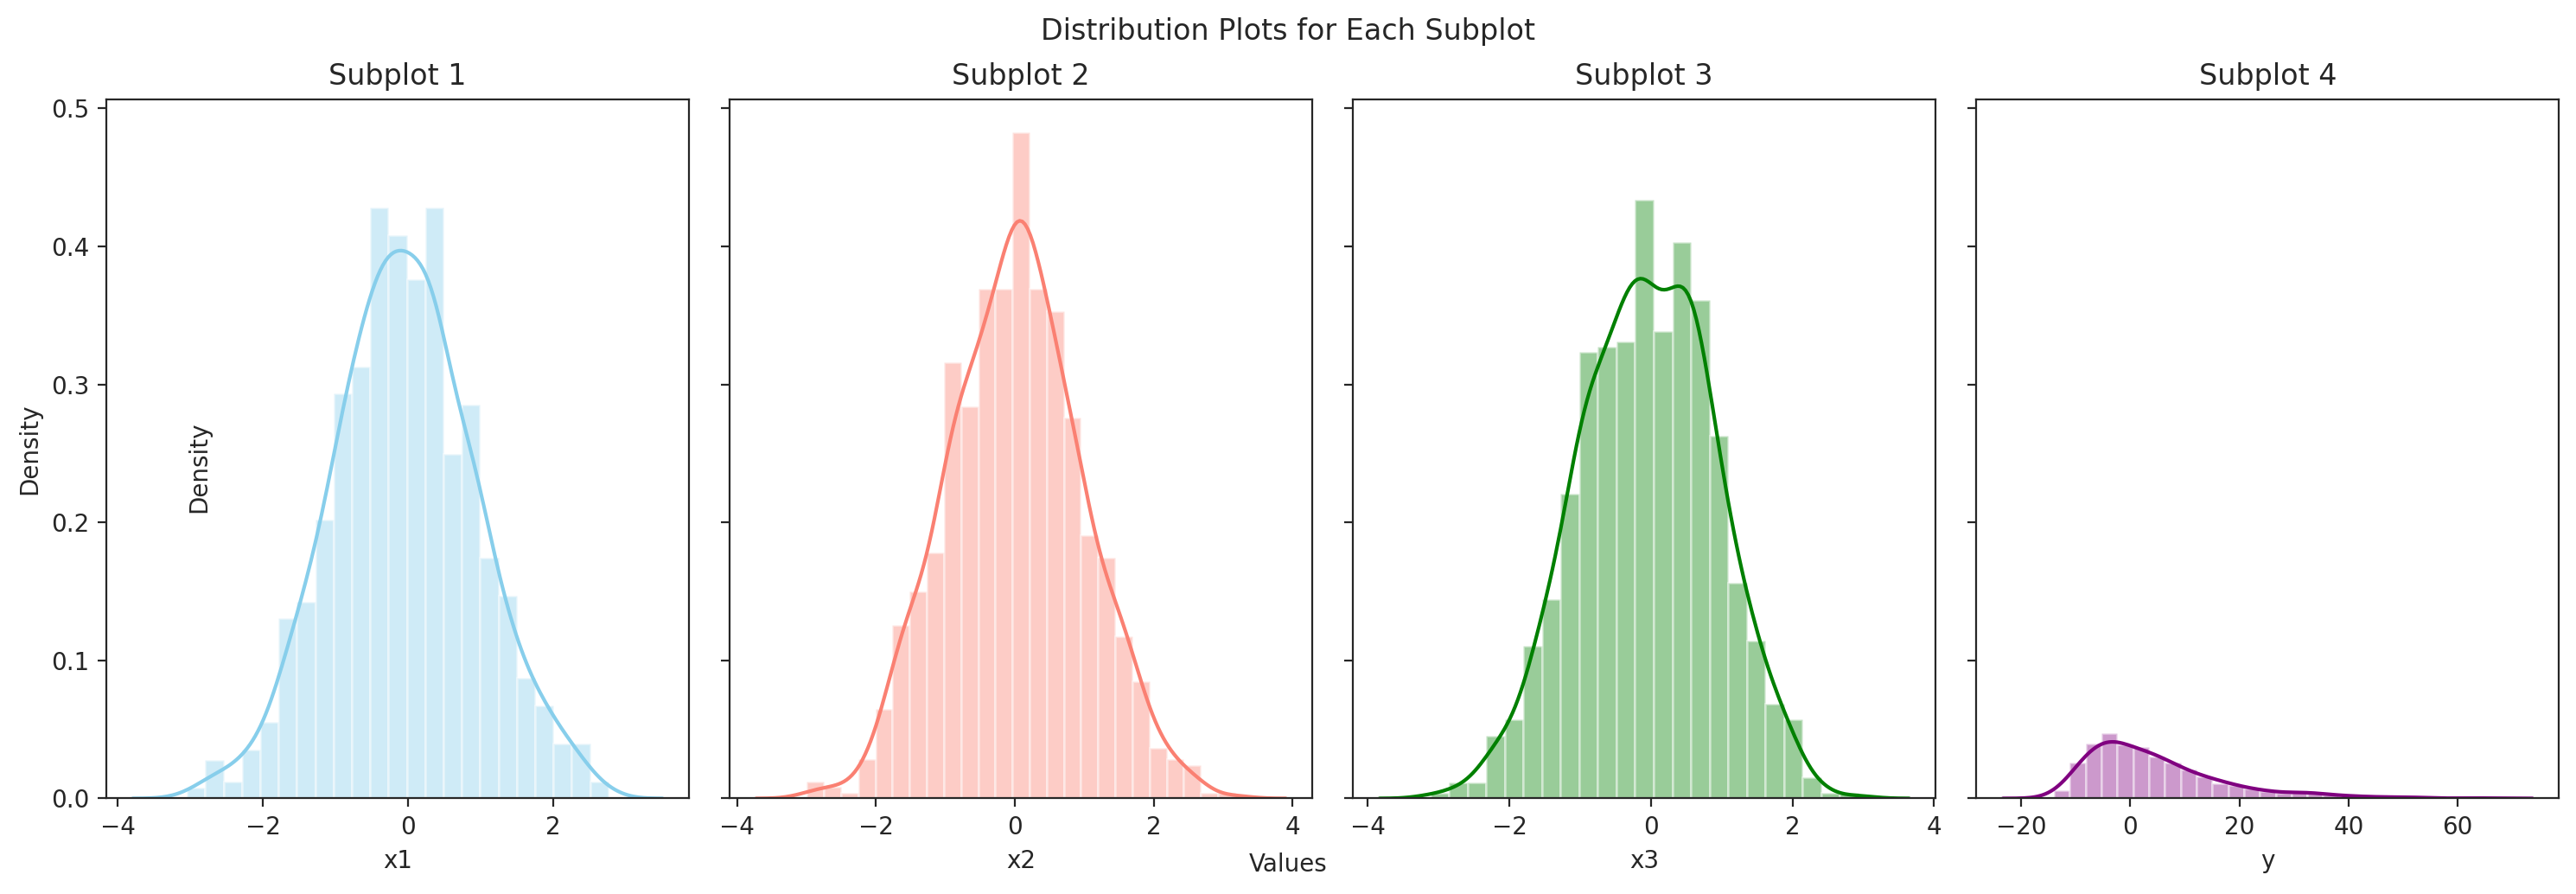

In [12]:
# visualize distribution
# Create a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)

# Plotting the distribution for each subplot
sns.distplot(df['x1'], kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Subplot 1")

sns.distplot(df['x2'], kde=True, color="salmon", ax=axes[1])
axes[1].set_title("Subplot 2")

sns.distplot(df['x3'], kde=True, color="green", ax=axes[2])
axes[2].set_title("Subplot 3")

sns.distplot(df['y'], kde=True, color="purple", ax=axes[3])
axes[3].set_title("Subplot 4")

# Add a common y-axis label
fig.text(0.5, 0.04, 'Values', ha='center', va='center')
fig.text(0.08, 0.5, 'Density', ha='center', va='center', rotation='vertical')

# Adjust layout to prevent clipping of y-axis labels
plt.tight_layout()

# Show the plot
plt.suptitle("Distribution Plots for Each Subplot", y=1.02)
plt.show()

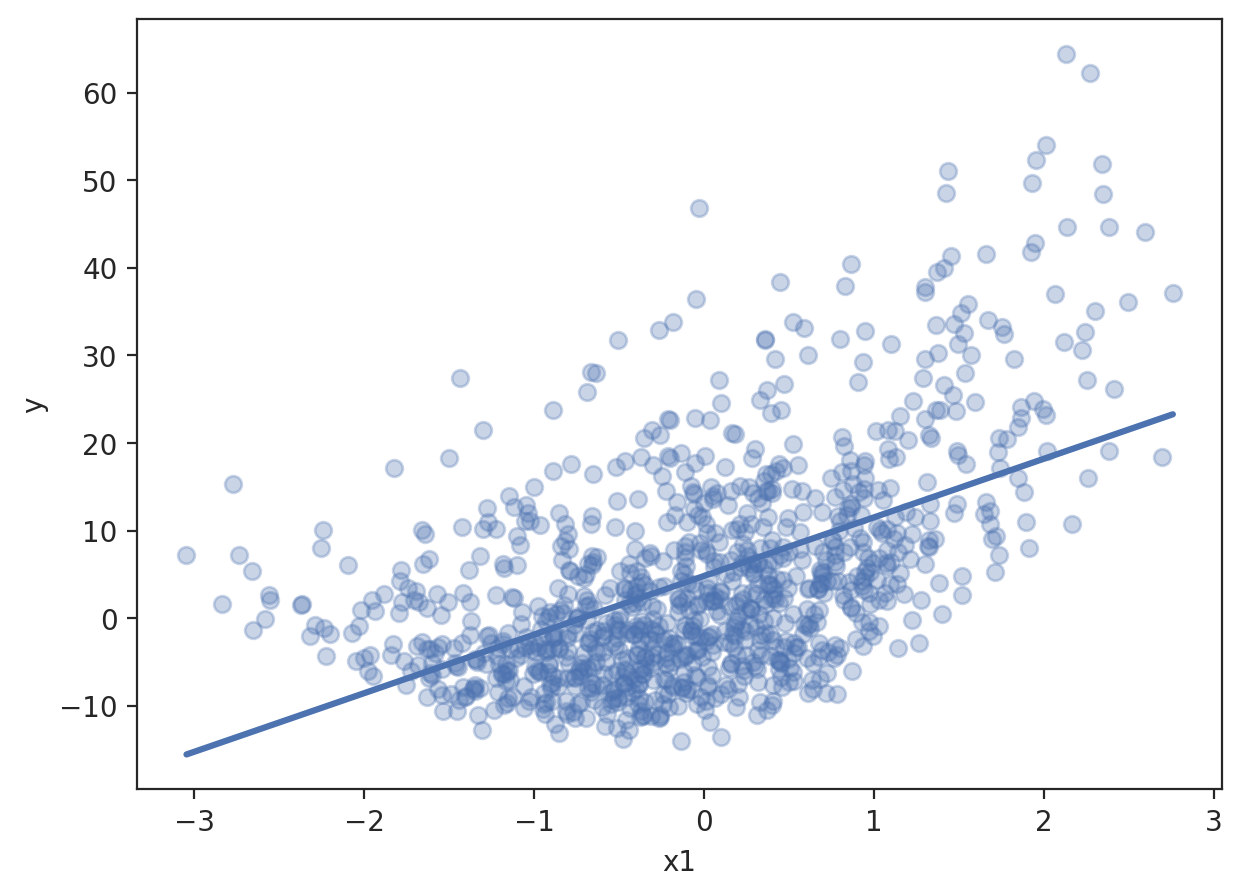

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=df, x='x1', y='y',
    scatter_kws=dict(alpha=0.3), ax=ax, ci=None
);

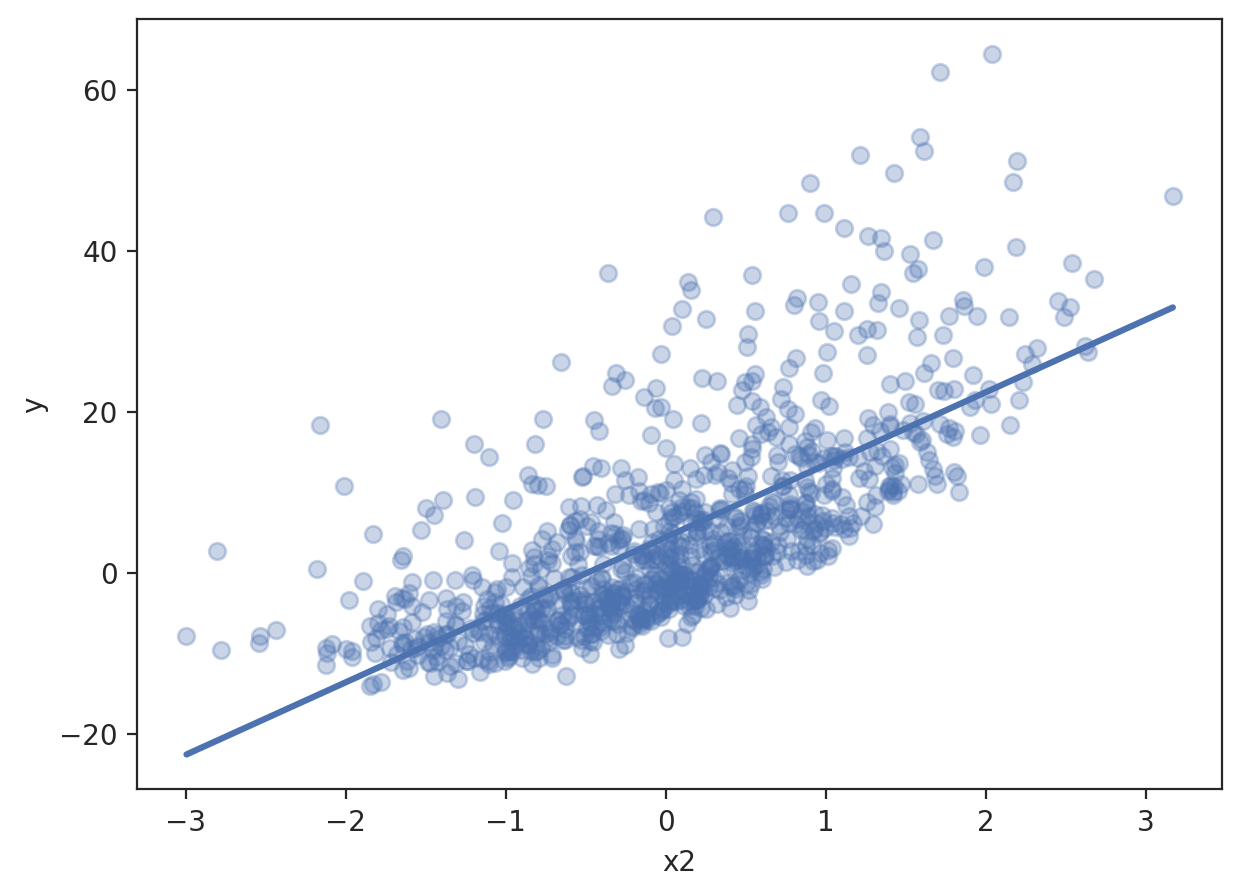

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=df, x='x2', y='y',
    scatter_kws=dict(alpha=0.3), ax=ax, ci=None
);

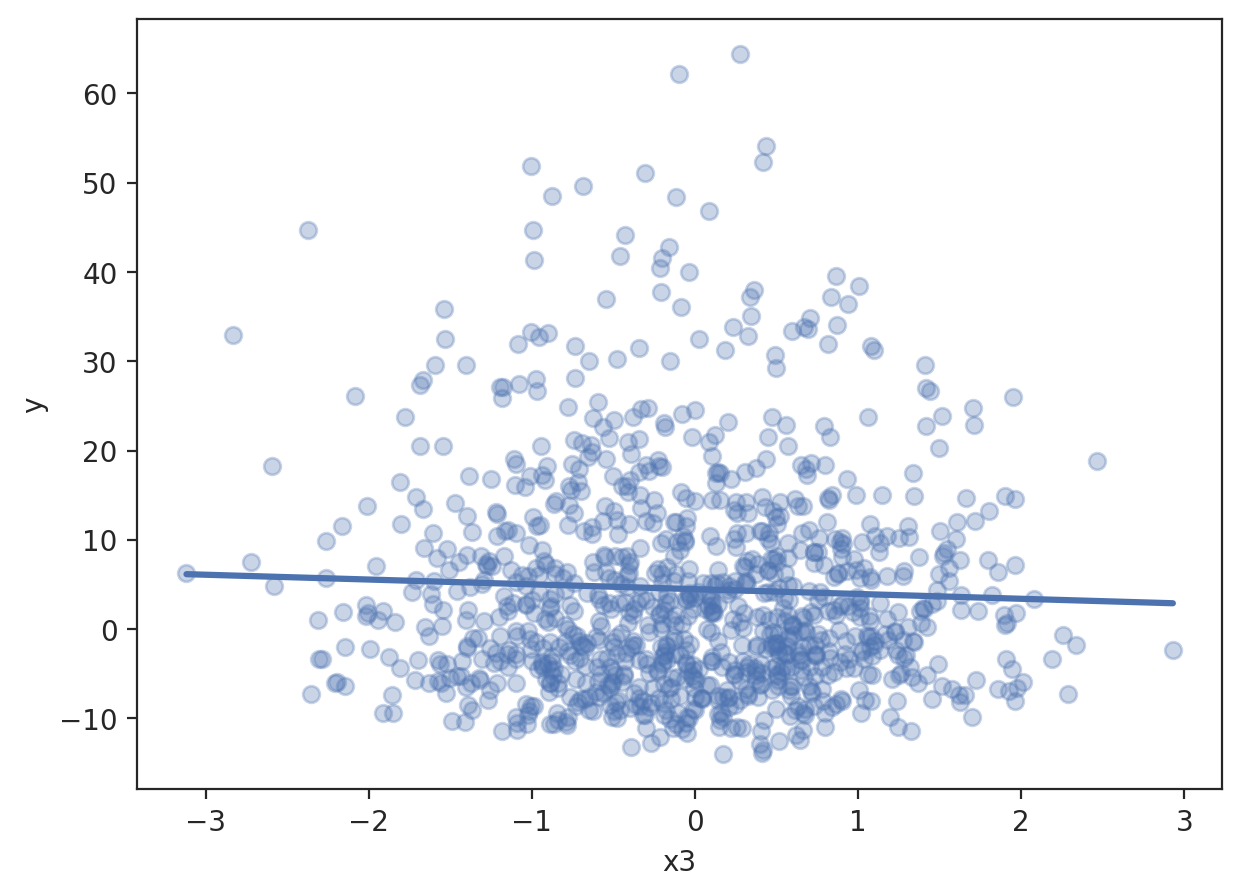

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=df, x='x3', y='y',
    scatter_kws=dict(alpha=0.3), ax=ax, ci=None
);

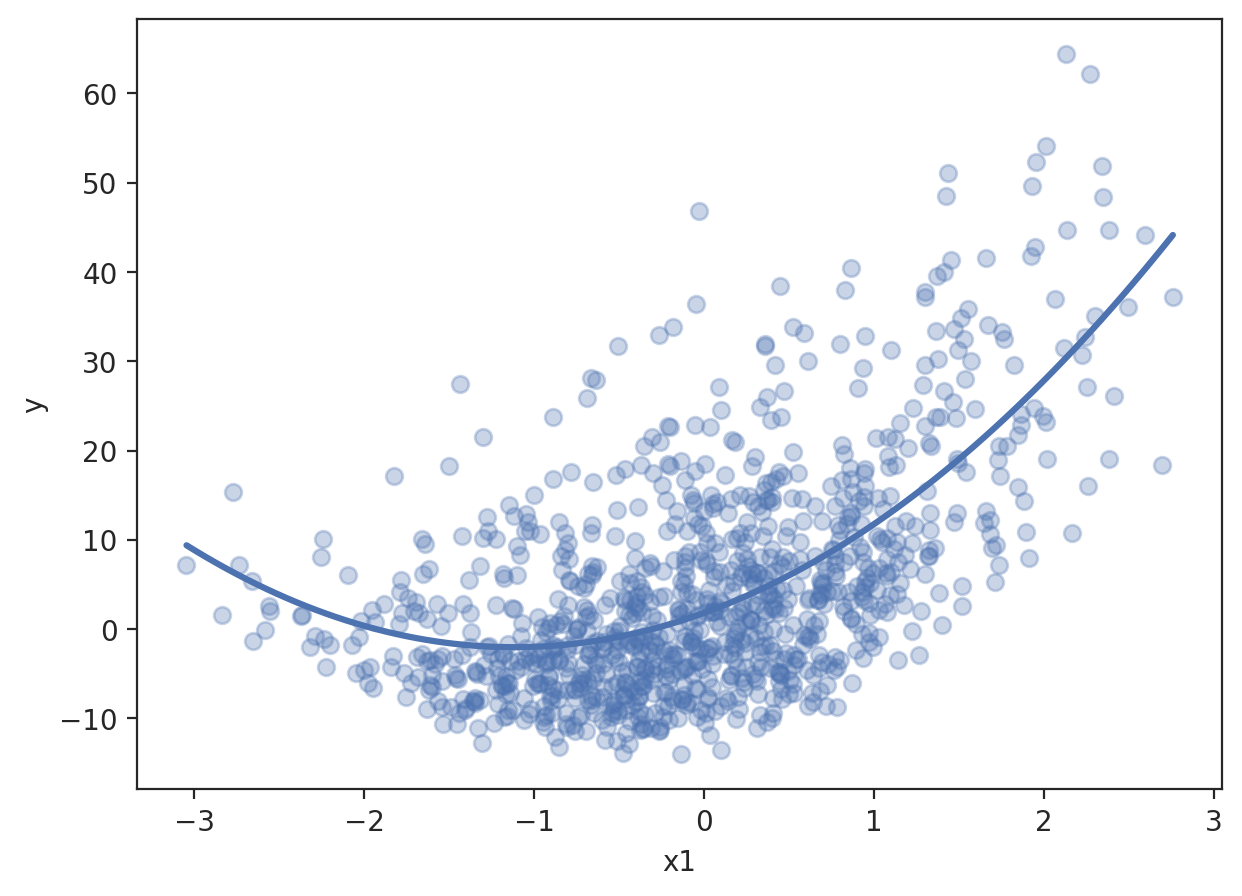

In [20]:
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(
    data=df, x='x1', y='y', order=2,
    scatter_kws=dict(alpha=0.3), ax=ax, ci=None
);

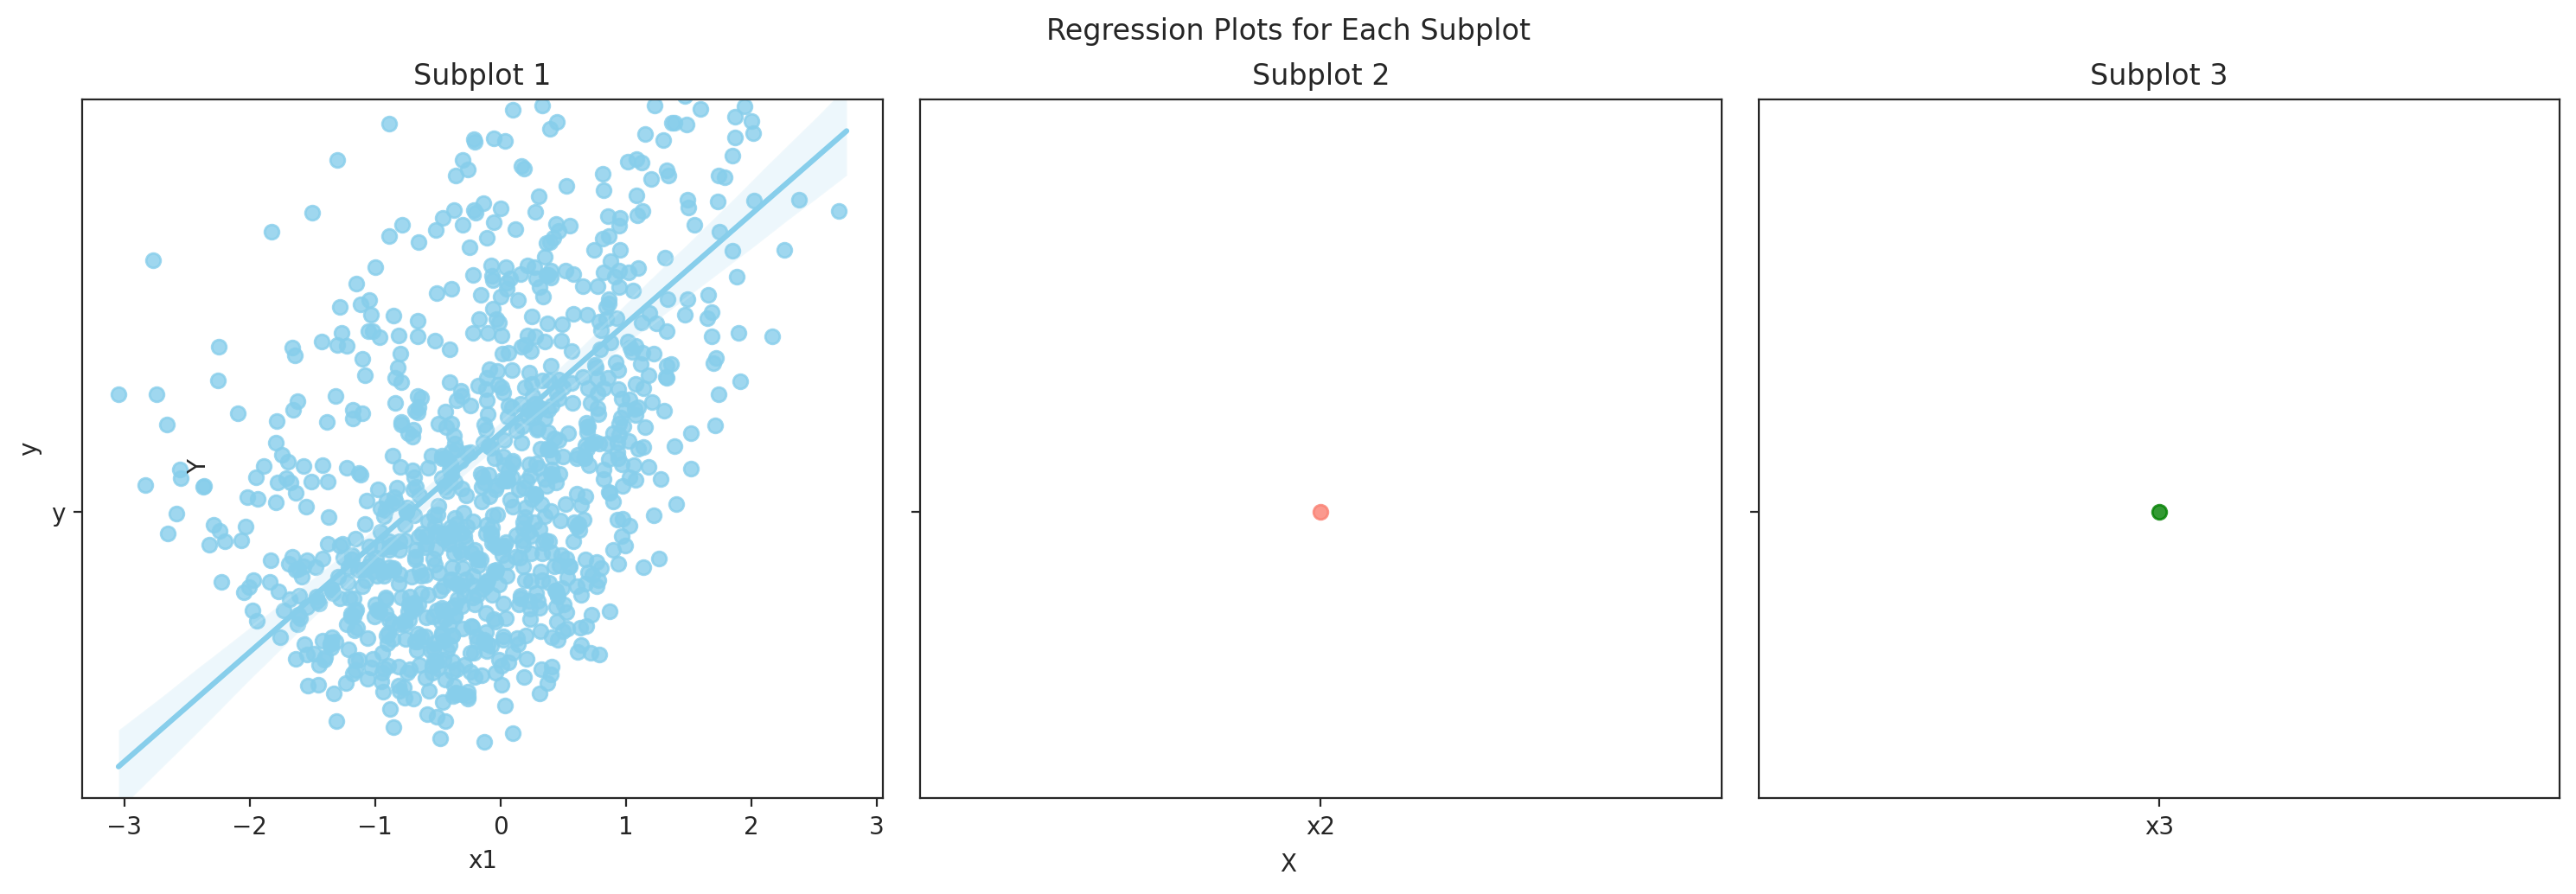

In [16]:
# Plotting regplot for each subplot

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.regplot(x=df['x1'], y=df['y'], ax=axes[0], color="skyblue")
axes[0].set_title("Subplot 1")

sns.regplot(x=['x2'], y=['y'], ax=axes[1], color="salmon")
axes[1].set_title("Subplot 2")

sns.regplot(x=['x3'], y=['y'], ax=axes[2], color="green")
axes[2].set_title("Subplot 3")

# Add a common y-axis label
fig.text(0.5, 0.04, 'X', ha='center', va='center')
fig.text(0.08, 0.5, df'Y', ha='center', va='center', rotation='vertical')

# Adjust layout to prevent clipping of y-axis labels
plt.tight_layout()

# Show the plot
plt.suptitle("Regression Plots for Each Subplot", y=1.02)
plt.show()